**1. 파일 업로드 및 확인**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('DATA_RESULT.csv')
print(data.head())
print(data.info())


   Unnamed: 0        matchId      gameId gameMode    gameVersion championName  \
0           0  KR_6975226241  6975226241  CLASSIC  14.4.562.8237        Corki   
1           1  KR_7002922042  7002922042  CLASSIC  14.6.570.6276        Nasus   
2           2  KR_6970181325  6970181325  CLASSIC  14.4.562.8237      Warwick   
3           3  KR_6989844106  6989844106  CLASSIC  14.5.565.1230       Rammus   
4           4  KR_7002814142  7002814142  CLASSIC  14.6.570.6276        Diana   

   championId teamPosition    win  allInPings  ...  teamDamagePercentage  \
0          42       MIDDLE  False           0  ...              0.199315   
1          75       MIDDLE  False           0  ...              0.135643   
2          19          TOP   True           0  ...              0.177209   
3          33       JUNGLE  False           1  ...              0.213718   
4         131       MIDDLE   True           0  ...              0.235215   

   maxCsAdvantageOnLaneOpponent  maxLevelLeadLaneOpponen

**전처리 1: 필요없는 열 삭제**

In [2]:
if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.drop(['matchId', 'gameId', 'gameMode', 'gameVersion', 'championName'], axis=1, inplace=True)
data = data.dropna(subset=['teamPosition'])
data.head()

,championId,teamPosition,win,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,...,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2,Tier
0,42,MIDDLE,False,0,2,7,0,0,13640,15,...,0.199315,20.0,1.0,8369,8304,8345,8347,8473,8451,SILVER
1,75,MIDDLE,False,0,1,3,0,0,10681,13,...,0.135643,0.0,1.0,8230,8226,8210,8237,8345,8347,SILVER
2,19,TOP,True,0,0,3,0,0,12100,14,...,0.177209,62.0,3.0,8008,8009,9104,8299,8444,8453,SILVER
3,33,JUNGLE,False,1,0,20,0,0,14500,15,...,0.213718,4.0,1.0,8439,8463,8429,8242,9104,9111,SILVER
4,131,MIDDLE,True,0,1,4,0,0,10511,13,...,0.235215,6.0,1.0,8112,8143,8138,8135,8473,8453,SILVER


**전처리 2: NaN 또는 Null 값 확인 및 처리**

In [3]:
# NaN 및 Null 포함도를 확인하여 결측치를 제거함
print((data.isnull().sum()/len(data)*100).sort_values(ascending=False)[:20])

maxCsAdvantageOnLaneOpponent    2.830393
maxLevelLeadLaneOpponent        2.830356
killParticipation               1.959296
teamDamagePercentage            0.383399
gameLength                      0.179808
damagePerMinute                 0.179771
controlWardsPlaced              0.179771
goldPerMinute                   0.179771
baronTakedowns                  0.179771
dragonTakedowns                 0.179771
turretTakedowns.1               0.179771
visionScorePerMinute            0.179771
jungleCsBefore10Minutes         0.179771
enemyJungleMonsterKills         0.179771
wardTakedowns                   0.179771
kda                             0.179771
takedowns                       0.179771
wardsKilled                     0.000074
visionClearedPings              0.000074
goldSpent                       0.000037
dtype: float64


In [4]:
# 수치형 데이터만 추출하여 각 열의 결측값을 해당 열의 중앙값으로 채움.
numeric = data.select_dtypes(include=['int', 'float'])

columns_to_impute = numeric.columns[1:-4]
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())

In [5]:
# bool 타입의 데이터를 0과 1로 반환
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

In [6]:
# win 열은 타깃이기에 따로 DataFrame으로 저장
win_columns = pd.DataFrame(data['win'], columns=['win'])
data.drop('win', axis=1, inplace=True)

win_columns

,win
0,0
1,0
2,1
3,0
4,1
...,...
2718436,1
2718437,0
2718438,0
2718439,0


In [7]:
# 최종으로 NaN 값이 포함되어있는지 확인
print(data.isnull().sum())

championId       0
teamPosition     0
allInPings       0
assistMePings    0
assists          0
                ..
primaryStyle3    0
primaryStyle4    0
subStyle1        0
subStyle2        0
Tier             0
Length: 133, dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2716231 entries, 0 to 2718440
Columns: 133 entries, championId to Tier
dtypes: float64(31), int32(7), int64(89), object(6)
memory usage: 2.6+ GB


In [9]:
for cl in data.columns:
    if data[cl].dtype == np.int32:
        data[cl] = data[cl].astype(np.int64)

**범주형 데이터와 수치형 데이터 확인**

In [10]:
"""
    범주형열과 수치형열은 아래와 같아야 됨.
    Categorical:
        ['teamPosition', 'individualPosition', 'lane', 'role', 'championId', 
        'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
    numeric:
        ['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', ...]
    
"""
# 데이터프레임에서 각 타입의 컬럼 선택
numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# 범주형 컬럼 리스트
specified_categorical_columns = [
    'teamPosition', 'individualPosition',  'championId', 'lane', 'role',
    'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2'
]

# 범주형 컬럼에 추가된 지정된 컬럼 포함
categorical_columns = [col for col in specified_categorical_columns if col in data.columns]

# 수치형 컬럼에서 범주형 컬럼에 포함된 컬럼을 제거
numeric_columns = [col for col in numeric_columns if col not in categorical_columns]

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numeric_columns)


Categorical Columns: ['teamPosition', 'individualPosition', 'championId', 'lane', 'role', 'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
Numerical Columns: ['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'largestCriticalStrike', 'largestKillingSpree', 'largestM

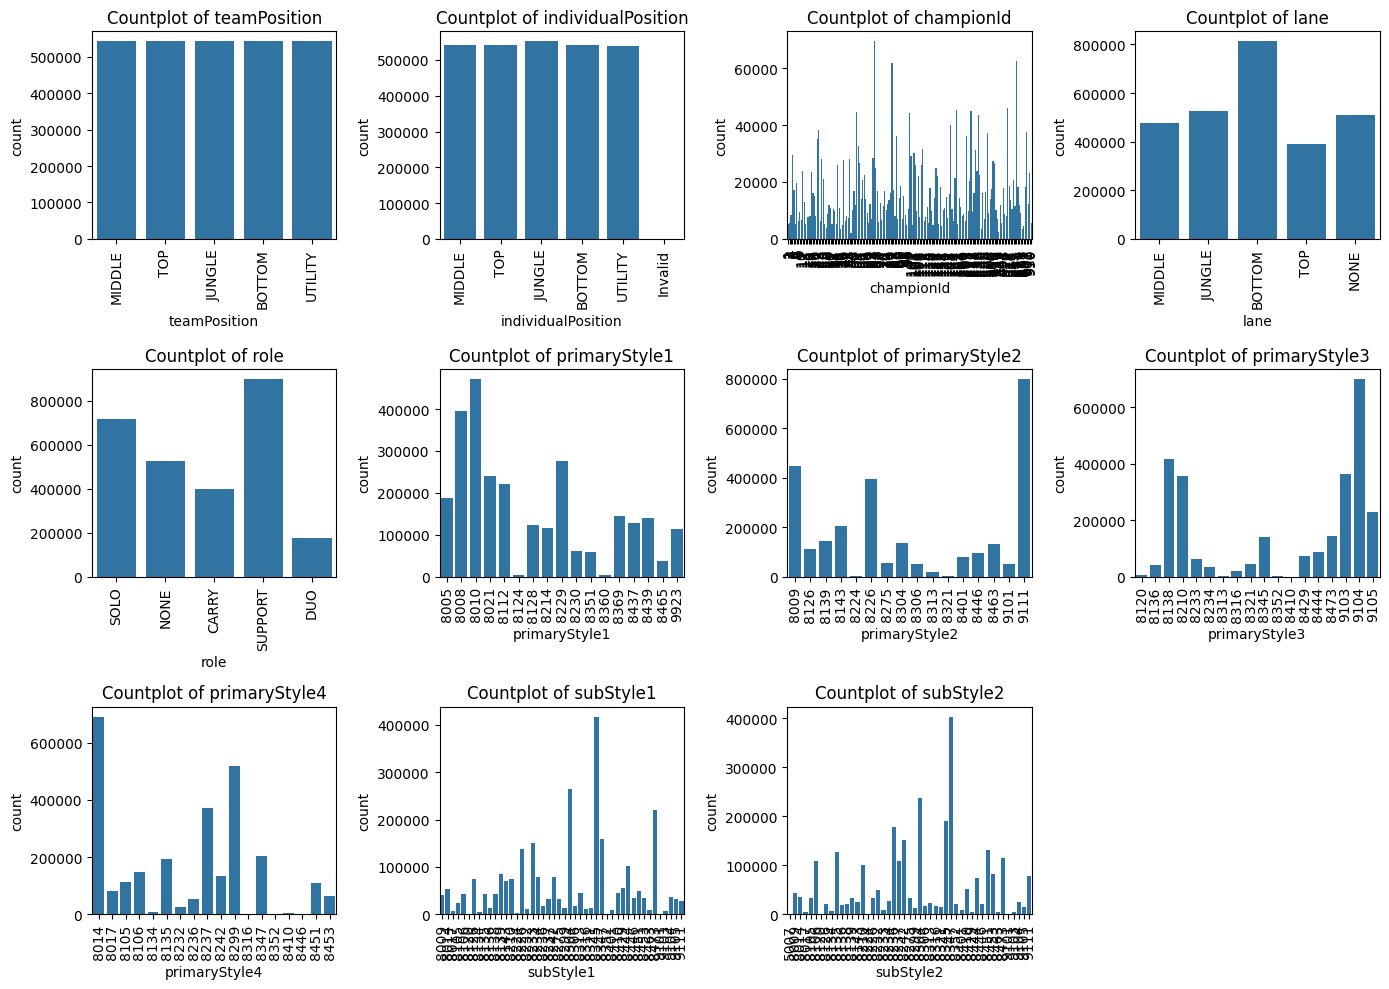

In [11]:
# 동일 값 포함도 그래프 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**전처리 3: 인코딩 및 임베딩**

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle

label_encoders = {feature: LabelEncoder() for feature in categorical_columns}
for feature in categorical_columns:
    data[feature] = label_encoders[feature].fit_transform(data[feature])

for feature, encoder in label_encoders.items():
    with open(f'Label_pkl/label_encoder_{feature}.pkl', 'wb') as f:
        pickle.dump(encoder, f)

scaler = StandardScaler()
X_num = scaler.fit_transform(data[numeric_columns])

data.head(10)


,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2,Tier
0,41,2,0,2,7,0,0,13640,15,0.0,...,0.199315,20.0,1.0,12,7,9,12,40,38,SILVER
1,65,2,0,1,3,0,0,10681,13,0.0,...,0.135643,0.0,1.0,9,5,3,8,29,31,SILVER
2,18,3,0,0,3,0,0,12100,14,0.0,...,0.177209,62.0,3.0,1,0,16,10,35,39,SILVER
3,32,1,1,0,20,0,0,14500,15,0.0,...,0.213718,4.0,1.0,14,13,12,9,43,46,SILVER
4,104,2,0,1,4,0,0,10511,13,0.0,...,0.235215,6.0,1.0,4,3,2,5,40,39,SILVER
5,125,0,0,0,4,0,0,14782,16,0.0,...,0.168761,1.0,0.0,1,0,15,0,11,9,SILVER
6,12,2,0,1,2,0,0,12665,14,0.0,...,0.321836,43.0,1.0,2,0,17,10,26,30,SILVER
7,101,2,0,4,6,0,0,16506,17,0.0,...,0.253326,16.0,1.0,2,15,17,10,21,41,SILVER
8,110,4,0,0,13,0,0,12892,14,0.0,...,0.216212,39.2,2.0,8,5,3,8,11,4,SILVER
9,107,1,3,2,1,0,0,12314,14,0.0,...,0.111847,4.4,1.0,8,5,3,8,6,5,SILVER


**TabTransformer 설정 및 학습**

In [13]:
# 학습에 필요한 라이브러리
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, roc_curve, auc

In [14]:
X_cat = torch.tensor(data[categorical_columns].values, dtype=torch.long)
X_num = torch.tensor(X_num, dtype=torch.float)
y = torch.tensor(win_columns.values, dtype=torch.float).unsqueeze(1)

dataset = TensorDataset(X_cat, X_num, y)
# 훈련 데이터 로더 설정
train_loader = DataLoader(
    dataset=dataset,
    batch_size=512,       # 배치 크기
    shuffle=True,        # 데이터 셔플링
    num_workers=4,       # 데이터 로딩을 위한 병렬 프로세스 수
    pin_memory=True      # GPU 전송 최적화를 위해 메모리 고정
)

# 검증 데이터 로더 설정
val_loader = DataLoader(
    dataset=dataset,
    batch_size=512,       # 배치 크기
    shuffle=False,       # 검증 데이터셋은 보통 셔플하지 않음
    num_workers=4,       # 데이터 로딩을 위한 병렬 프로세스 수
    pin_memory=True      # GPU 전송 최적화를 위해 메모리 고정
)

In [15]:
class TabTransformer(nn.Module):
    def __init__(self, num_categories, embed_dim, num_heads, num_layers, dropout_rate):
        super(TabTransformer, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.dropout_rate = dropout_rate
        self.embeddings = nn.ModuleList([nn.Embedding(num_categories[i], embed_dim) for i in range(len(num_categories))])
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(embed_dim * len(num_categories) + len(numeric_columns), 1)
        
        self._init_weights()

    def _init_weights(self):
        nn.init.kaiming_uniform_(self.regressor.weight, mode='fan_in', nonlinearity='relu')
        for embedding in self.embeddings:
            nn.init.kaiming_uniform_(embedding.weight, mode='fan_in', nonlinearity='relu')
        
    def forward(self, x_cat, x_num):
        x = [self.embeddings[i](x_cat[:, i]) for i in range(len(self.embeddings))]
        x = torch.stack(x, dim=1)
        x = self.transformer_encoder(x).view(x.size(0), -1)
        x = torch.cat((x, x_num), dim=1)
        output = self.regressor(x).squeeze()
        return output

In [16]:
def plot_auc_roc(labels, predictions, title, train_losses, val_losses, train_acc, val_acc):
    fpr, tpr, _ = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)
    
    # 손실 및 메트릭 그래프 그리기
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

    # AUC-ROC 그래프 그리기
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [17]:
def train(model, train_loader, val_loader, epochs, criterion, optimizer, device):
    model.train()

    # 에폭별 손실 및 메트릭 저장 리스트
    train_losses, val_losses = [], []
    train_acc, val_acc = [], []
    train_f1, val_f1 = [], []
    train_auc, val_auc = [], []

    for epoch in range(epochs):
        train_loss, val_loss = 0.0, 0.0
        predictions_train, labels_train = [], []
        predictions_val, labels_val = [], []

        # 훈련 과정
        for (x_cat, x_num, labels) in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x_cat, x_num).squeeze()
            labels = labels.squeeze()
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item() * labels.size(0)
            outputs = torch.sigmoid(outputs).detach().cpu().numpy()
            predictions_train.extend(outputs)
            labels_train.extend(labels.cpu().numpy())

        # 에폭별 평균 손실 및 메트릭 계산
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)
        predictions_train_np = np.array(predictions_train)
        labels_train_np = np.array(labels_train)
        train_acc.append(accuracy_score(labels_train_np, predictions_train_np > 0.5))
        train_f1.append(f1_score(labels_train_np, predictions_train_np > 0.5))
        train_auc.append(roc_auc_score(labels_train_np, predictions_train_np))

        # 검증 과정
        model.eval()
        with torch.no_grad():
            for (x_cat, x_num, labels) in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
                x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
                outputs = model(x_cat, x_num).squeeze()
                labels = labels.squeeze()  # 출력과 일치하도록 레이블을 평탄화
                val_loss += criterion(outputs, labels).item() * labels.size(0)
                outputs = torch.sigmoid(outputs).cpu().numpy()
                predictions_val.extend(outputs)
                labels_val.extend(labels.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)
        predictions_val_np = np.array(predictions_val)
        labels_val_np = np.array(labels_val)
        val_acc.append(accuracy_score(labels_val_np, predictions_val_np > 0.5))
        val_f1.append(f1_score(labels_val_np, predictions_val_np > 0.5))
        val_auc.append(roc_auc_score(labels_val_np, predictions_val_np))

        # 각 에폭의 결과 출력
        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc[-1]:.2f}, Train F1 = {train_f1[-1]:.2f}, Train AUC = {train_auc[-1]:.2f}")
        print(f"           Val Loss = {val_loss:.4f}, Val Acc = {val_acc[-1]:.2f}, Val F1 = {val_f1[-1]:.2f}, Val AUC = {val_auc[-1]:.2f}")


    # AUC-ROC 그래프 그리기
    plot_auc_roc(labels_train_np, predictions_train_np, "Train", train_losses, val_losses, train_acc, val_acc)
    plot_auc_roc(labels_val_np, predictions_val_np, "Validation", train_losses, val_losses, train_acc, val_acc)

    return train_losses[-1], val_losses[-1], train_auc[-1], val_auc[-1]


In [18]:
def evaluate_classification(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for x_cat, x_num, labels in data_loader:
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            outputs = model(x_cat, x_num).squeeze()

            labels = labels.squeeze()

            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)

            # 로짓을 확률로 변환
            outputs = torch.sigmoid(outputs).detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()
            all_predictions.extend(outputs)
            all_targets.extend(labels)

    # 전체 데이터셋에 대한 평균 손실 계산
    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = accuracy_score(all_targets, np.round(all_predictions))
    f1 = f1_score(all_targets, np.round(all_predictions))
    auc_roc = roc_auc_score(all_targets, all_predictions)

    return avg_loss, accuracy, f1, auc_roc

In [19]:
import torch
from copy import deepcopy
from sklearn.metrics import roc_auc_score

def initialize_model(num_categories, embed_dim, num_heads, num_layers, dropout_rate):
    # 모델을 재초기화하는 함수
    return TabTransformer(num_categories=num_categories, embed_dim=embed_dim, num_heads=num_heads, num_layers=num_layers, dropout_rate=dropout_rate)

def train_and_evaluate(model, train_loader, val_loader, params, device):
    best_val_auc = float('-inf')
    best_params = None
    initial_state = deepcopy(model.state_dict())  # 모델의 초기 상태를 저장합니다.

    for num_layers in params['num_layers']:
        for num_heads in params['num_heads']:
            for dropout_rate in params['dropout_rate']:
                # 초기 상태로 모델을 리셋합니다.
                model.load_state_dict(deepcopy(initial_state))
                # 모델 파라미터 설정
                model.num_layers = num_layers
                model.num_heads = num_heads
                model.dropout_rate = dropout_rate
                # 모델을 적절한 장치로 이동
                model.to(device)
                # 최적화 함수와 손실 함수를 설정
                optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001, weight_decay=0.01)
                criterion = torch.nn.BCEWithLogitsLoss()

                print(f"Training with layers={num_layers}, heads={num_heads}, dropout={dropout_rate}")
                train_loss, val_loss, train_auc, val_auc = train(model, train_loader, val_loader, 10, criterion, optimizer, device)

                if val_auc > best_val_auc:
                    best_val_auc = val_auc
                    best_params = {'num_layers': num_layers, 'num_heads': num_heads, 'dropout_rate': dropout_rate}
                    print(f"New best AUC: {best_val_auc:.4f} with params {best_params}")

    return best_params

# 하이퍼파라미터 정의
params = {
    'num_layers': [4, 6, 8, 16],
    'num_heads': [2, 4, 8, 16],
    'dropout_rate': [0.1, 0.2, 0.3],
}

num_categories = [data[cat].nunique() for cat in categorical_columns]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 초기화
model = initialize_model(num_categories=num_categories, embed_dim=32, num_heads=8, num_layers=6, dropout_rate=0.1)

# 훈련 및 평가 실행
best_params = train_and_evaluate(model, train_loader, val_loader, params, device)
print(f"Optimal Hyperparameters: {best_params}")

'\nimport torch\nfrom copy import deepcopy\nfrom sklearn.metrics import roc_auc_score\n\ndef initialize_model(num_categories, embed_dim, num_heads, num_layers, dropout_rate):\n    # 모델을 재초기화하는 함수\n    return TabTransformer(num_categories=num_categories, embed_dim=embed_dim, num_heads=num_heads, num_layers=num_layers, dropout_rate=dropout_rate)\n\ndef train_and_evaluate(model, train_loader, val_loader, params, device):\n    best_val_auc = float(\'-inf\')\n    best_params = None\n    initial_state = deepcopy(model.state_dict())  # 모델의 초기 상태를 저장합니다.\n\n    for num_layers in params[\'num_layers\']:\n        for num_heads in params[\'num_heads\']:\n            for dropout_rate in params[\'dropout_rate\']:\n                # 초기 상태로 모델을 리셋합니다.\n                model.load_state_dict(deepcopy(initial_state))\n                # 모델 파라미터 설정\n                model.num_layers = num_layers\n                model.num_heads = num_heads\n                model.dropout_rate = dropout_rate\n               

Epoch 1 Validation: 100%|██████████| 5306/5306 [01:10<00:00, 75.79it/s]


Epoch 1: Train Loss = 0.5932, Train Acc = 0.69, Train F1 = 0.69, Train AUC = 0.76
           Val Loss = 0.4884, Val Acc = 0.81, Val F1 = 0.81, Val AUC = 0.89


Epoch 2 Validation: 100%|██████████| 5306/5306 [01:09<00:00, 75.99it/s]


Epoch 2: Train Loss = 0.4254, Train Acc = 0.85, Train F1 = 0.85, Train AUC = 0.93
           Val Loss = 0.3731, Val Acc = 0.88, Val F1 = 0.88, Val AUC = 0.95


Epoch 3 Validation: 100%|██████████| 5306/5306 [01:09<00:00, 76.55it/s]


Epoch 3: Train Loss = 0.3369, Train Acc = 0.90, Train F1 = 0.90, Train AUC = 0.96
           Val Loss = 0.3064, Val Acc = 0.91, Val F1 = 0.91, Val AUC = 0.97


Epoch 4 Validation: 100%|██████████| 5306/5306 [01:10<00:00, 75.66it/s]


Epoch 4: Train Loss = 0.2838, Train Acc = 0.92, Train F1 = 0.91, Train AUC = 0.97
           Val Loss = 0.2643, Val Acc = 0.92, Val F1 = 0.92, Val AUC = 0.97


Epoch 5 Validation: 100%|██████████| 5306/5306 [01:09<00:00, 75.83it/s]


Epoch 5: Train Loss = 0.2492, Train Acc = 0.93, Train F1 = 0.92, Train AUC = 0.98
           Val Loss = 0.2357, Val Acc = 0.93, Val F1 = 0.93, Val AUC = 0.98


Epoch 6 Validation: 100%|██████████| 5306/5306 [01:09<00:00, 76.70it/s]


Epoch 6: Train Loss = 0.2247, Train Acc = 0.93, Train F1 = 0.93, Train AUC = 0.98
           Val Loss = 0.2145, Val Acc = 0.94, Val F1 = 0.93, Val AUC = 0.98


Epoch 7 Validation: 100%|██████████| 5306/5306 [01:07<00:00, 78.38it/s]


Epoch 7: Train Loss = 0.2058, Train Acc = 0.94, Train F1 = 0.94, Train AUC = 0.98
           Val Loss = 0.1977, Val Acc = 0.94, Val F1 = 0.94, Val AUC = 0.98


Epoch 8 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.10it/s]


Epoch 8: Train Loss = 0.1908, Train Acc = 0.94, Train F1 = 0.94, Train AUC = 0.98
           Val Loss = 0.1841, Val Acc = 0.94, Val F1 = 0.94, Val AUC = 0.99


Epoch 9 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.03it/s]


Epoch 9: Train Loss = 0.1783, Train Acc = 0.95, Train F1 = 0.95, Train AUC = 0.99
           Val Loss = 0.1727, Val Acc = 0.95, Val F1 = 0.95, Val AUC = 0.99


Epoch 10 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.26it/s]


Epoch 10: Train Loss = 0.1678, Train Acc = 0.95, Train F1 = 0.95, Train AUC = 0.99
           Val Loss = 0.1630, Val Acc = 0.95, Val F1 = 0.95, Val AUC = 0.99


Epoch 11 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.92it/s]


Epoch 11: Train Loss = 0.1588, Train Acc = 0.95, Train F1 = 0.95, Train AUC = 0.99
           Val Loss = 0.1547, Val Acc = 0.95, Val F1 = 0.95, Val AUC = 0.99


Epoch 12 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.91it/s]


Epoch 12: Train Loss = 0.1510, Train Acc = 0.95, Train F1 = 0.95, Train AUC = 0.99
           Val Loss = 0.1475, Val Acc = 0.96, Val F1 = 0.95, Val AUC = 0.99


Epoch 13 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.18it/s]


Epoch 13: Train Loss = 0.1442, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1413, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 14 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.11it/s]


Epoch 14: Train Loss = 0.1382, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1354, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 15 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.31it/s]


Epoch 15: Train Loss = 0.1329, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1305, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 16 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.46it/s]


Epoch 16: Train Loss = 0.1282, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1260, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 17 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.94it/s]


Epoch 17: Train Loss = 0.1240, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1220, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 18 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.21it/s]


Epoch 18: Train Loss = 0.1203, Train Acc = 0.96, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1184, Val Acc = 0.96, Val F1 = 0.96, Val AUC = 0.99


Epoch 19 Validation: 100%|██████████| 5306/5306 [01:04<00:00, 82.80it/s]


Epoch 19: Train Loss = 0.1169, Train Acc = 0.97, Train F1 = 0.96, Train AUC = 0.99
           Val Loss = 0.1153, Val Acc = 0.97, Val F1 = 0.97, Val AUC = 0.99


Epoch 20 Validation: 100%|██████████| 5306/5306 [01:03<00:00, 83.11it/s]


Epoch 20: Train Loss = 0.1138, Train Acc = 0.97, Train F1 = 0.97, Train AUC = 0.99
           Val Loss = 0.1123, Val Acc = 0.97, Val F1 = 0.97, Val AUC = 0.99


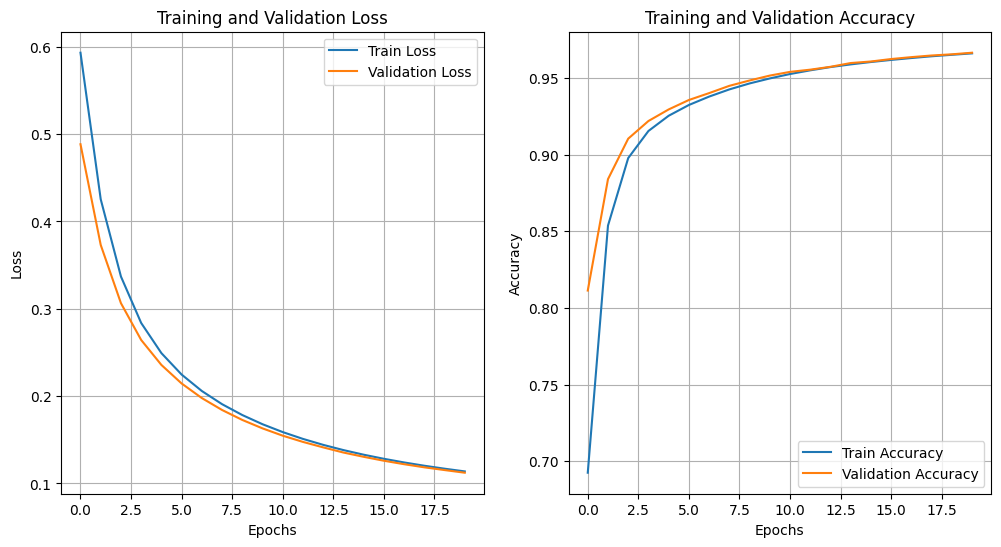

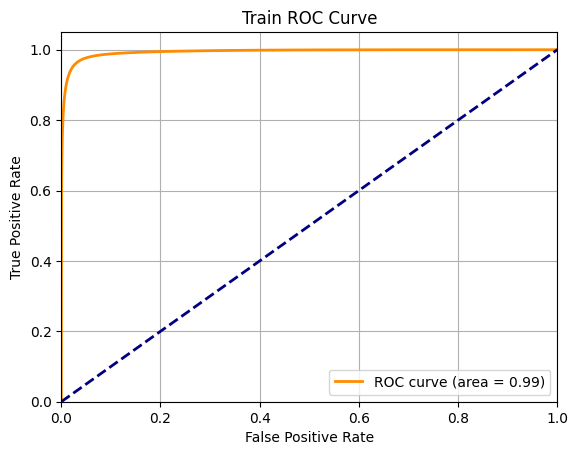

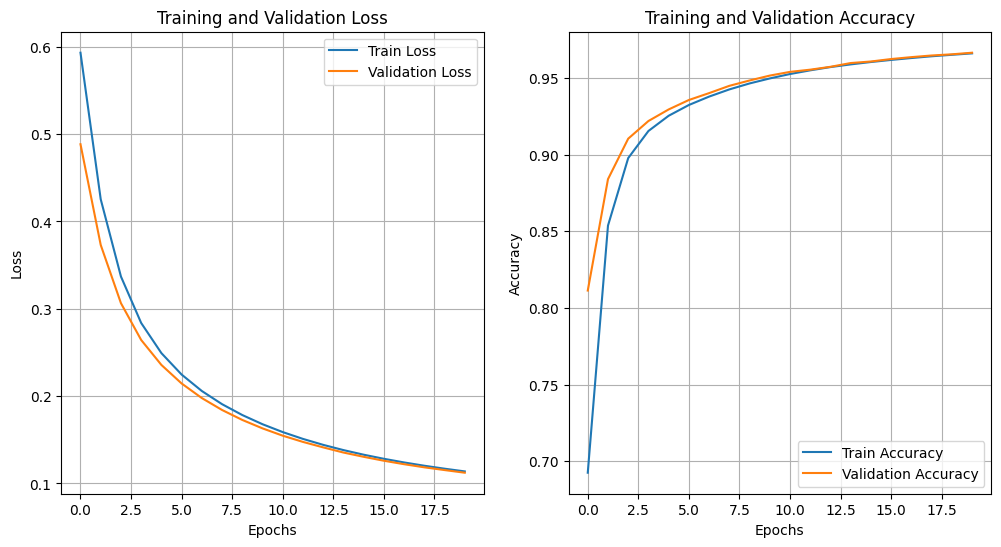

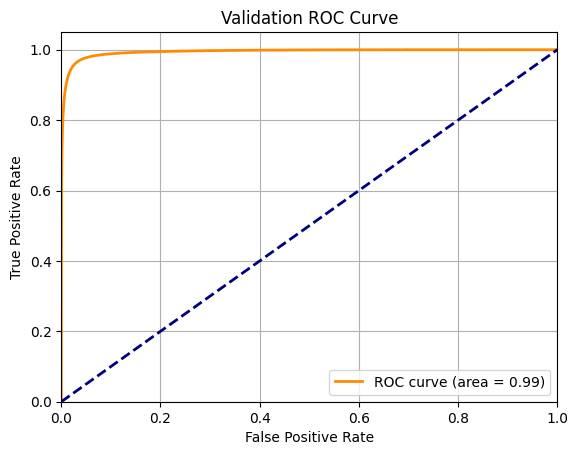

(0.11377209469557285,
 0.1122643982255202,
 0.9938740242863414,
 0.9940110487272364)

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_categories = [data[cat].nunique() for cat in categorical_columns]

# TabTransformer 모델 초기화
model = TabTransformer(num_categories=num_categories, embed_dim=32, num_heads=4, num_layers=6, dropout_rate=0.2)

# 이진 분류 문제의 손실 함수로 BCEWithLogitsLoss 사용
criterion = nn.BCEWithLogitsLoss()

# 옵티마이저 설정 (AdamW 사용)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00001, weight_decay=0.01)
model = model.to(device)

train(model, train_loader, val_loader, epochs=20, criterion=criterion, optimizer=optimizer, device=device)

**모델 성능 확인, 저장**

In [21]:
# 성능 지표 계산
loss, accuracy, f1, auc_roc = evaluate_classification(model, val_loader, nn.BCEWithLogitsLoss(), device)

# 성능 지표 출력
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Loss: 0.1123
Accuracy: 0.9664
F1 Score: 0.9663
AUC-ROC: 0.9940


In [22]:
# 훈련된 모델을 .pth로 저장
torch.save(model.state_dict(), 'TabTransformer_model.pth')

**모델 실제 사용 시 과정과 결과**
-- 아래는 아직 개발 중에 있음

실제 사용 시 챔피언 종류(championId, championName)와 룬(perk)만을 이용하여 조합을 보고 예측을 해야한다. (Input 2개 -> Output 1개)

> 두 가지 방법
1. 10명 개개인의 최근 5게임 전적을 평균내어 할 것인가
2. Vector Store 방법을 이용할 것인가

In [23]:
test_data = pd.read_csv('test_data_2.csv')

test_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'test_data_2.csv'

In [ ]:
if 'Unnamed: 0' in test_data.columns:
    test_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

test_data.drop(['matchId', 'gameId', 'gameMode', 'gameVersion', 'championName'], axis=1, inplace=True)
test_data.drop('win', axis=1, inplace=True)

for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

test_data.head(10)

,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,64.0,JUNGLE,0,0.0,5,0,0,12257,14.0,0,...,20.000000,0.189453,8.0,2.0,8010,9111,9104,8014,8304,8347
1,238.0,MIDDLE,0,1.0,4,0,0,14738,16.0,0,...,2.500000,0.196527,18.5,2.0,8369,8313,8321,8347,8210,8237
2,89.0,UTILITY,0,6.0,16,0,0,12148,14.0,0,...,21.000000,0.152658,19.0,3.0,8351,8306,8345,8347,8473,8242
3,266.0,TOP,0,2.0,3,0,0,13615,15.0,0,...,1.500000,0.143189,0.0,0.0,8010,9111,9105,8299,8473,8453
4,51.0,BOTTOM,0,0.0,9,0,0,11854,14.0,0,...,6.000000,0.318173,8.4,2.0,8021,8009,9103,8014,8233,8236
5,233.0,JUNGLE,0,0.0,1,0,0,10043,13.0,0,...,0.125000,0.119194,12.0,1.0,8010,9111,9105,8014,8347,8304
6,74.0,TOP,0,1.0,1,0,0,14392,15.0,0,...,0.750000,0.369927,69.0,2.0,8229,8226,8233,8237,8304,8345
7,526.0,UTILITY,0,0.0,5,0,0,8495,11.0,0,...,1.000000,0.060469,1.0,1.0,8351,8306,8316,8347,8275,8232
8,222.0,BOTTOM,0,0.0,2,0,0,9608,12.0,0,...,0.666667,0.212379,14.0,1.0,8008,8009,9103,8014,8233,8236
9,777.0,MIDDLE,0,0.0,1,0,0,11947,14.0,0,...,0.555556,0.238031,23.0,1.0,8008,9111,9104,8299,8473,8453


In [ ]:
# 범주형 데이터 인코딩
test_categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()
test_numeric_columns = test_data.select_dtypes(exclude=['object']).columns.tolist()

test_categorical_columns.append(test_numeric_columns[0])
test_categorical_columns.extend(test_numeric_columns[-6:])

del test_numeric_columns[-6:]
del test_numeric_columns[0]

print(test_categorical_columns)
print(test_numeric_columns)

['teamPosition', 'individualPosition', 'lane', 'role', 'championId', 'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestT

In [ ]:
for feature in categorical_columns:
    with open(f'Label_pkl/label_encoder_{feature}.pkl', 'rb') as f:
        loaded_encoder = pickle.load(f)
        test_data[feature] = loaded_encoder.transform(test_data[feature])
test_data

,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,59,1,0,0.0,5,0,0,12257,14.0,0,...,20.000000,0.189453,8.0,2.0,2,15,16,0,24,31
1,131,2,0,1.0,4,0,0,14738,16.0,0,...,2.500000,0.196527,18.5,2.0,12,9,8,12,13,21
2,77,4,0,6.0,16,0,0,12148,14.0,0,...,21.000000,0.152658,19.0,3.0,10,8,9,12,40,22
3,136,3,0,2.0,3,0,0,13615,15.0,0,...,1.500000,0.143189,0.0,0.0,2,15,17,10,40,39
4,47,0,0,0.0,9,0,0,11854,14.0,0,...,6.000000,0.318173,8.4,2.0,3,0,15,0,17,20
5,127,1,0,0.0,1,0,0,10043,13.0,0,...,0.125000,0.119194,12.0,1.0,2,15,17,0,30,25
6,64,3,0,1.0,1,0,0,14392,15.0,0,...,0.750000,0.369927,69.0,2.0,8,5,4,8,24,30
7,153,4,0,0.0,5,0,0,8495,11.0,0,...,1.000000,0.060469,1.0,1.0,10,8,7,12,22,17
8,125,0,0,0.0,2,0,0,9608,12.0,0,...,0.666667,0.212379,14.0,1.0,1,0,15,0,17,20
9,156,2,0,0.0,1,0,0,11947,14.0,0,...,0.555556,0.238031,23.0,1.0,1,15,16,10,40,39


In [ ]:
# 데이터 세팅 및 수치형 데이터 인코딩
test_scaler = StandardScaler()
test_X_num = test_scaler.fit_transform(test_data[test_numeric_columns])

test_X_cat = torch.tensor(test_data[test_categorical_columns].values, dtype=torch.long)
test_X_num = torch.tensor(test_X_num, dtype=torch.float)

In [ ]:
data_set = TensorDataset(test_X_cat, test_X_num)

batch_size=10
loader = DataLoader(data_set, batch_size=batch_size, shuffle=False)

In [ ]:
# 모델의 state_dict 로드 (strict=False 옵션 사용)
state_dict = torch.load('TabTransformer_model.pth')
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

predictions = []
with torch.no_grad():
    for test_x_cat_batch, test_x_num_batch in loader:
        # 데이터를 올바른 디바이스로 이동
        test_x_cat_batch = test_x_cat_batch.to(device)
        test_x_num_batch = test_x_num_batch.to(device)

        # 모델을 통해 출력 계산
        output = model(test_x_cat_batch, test_x_num_batch)

        # 출력을 CPU로 이동하고 NumPy 배열로 변환
        output = output.cpu().numpy()
        predictions.extend(output)

        # 배치의 데이터 형상 출력 (디버깅을 위해)
        print(f"x_cat_batch shape: {test_x_cat_batch.shape}")
        print(f"x_num_batch shape: {test_x_num_batch.shape}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x473 and 472x1)

In [ ]:
columns = ['Blue Team 1', 'Blue Team 2', 'Blue Team 3', 'Blue Team 4', 'Blue Team 5','Red Team 1', 'Red Team 2', 'Red Team 3', 'Red Team 4', 'Red Team 5']
values = [float(pred[0]) for pred in predictions]

result = pd.DataFrame([values], columns=columns)
# 모든 값에 100을 곱하여 퍼센트로 변환
result_percent = result * 100

# 데이터프레임 내의 값들을 소수점 두 자리까지 표현
result_percent = result_percent.round(2)
result_percent

In [ ]:
# 각 팀의 열만 선택
blue_columns = [col for col in result.columns if 'Blue' in col]
red_columns = [col for col in result.columns if 'Red' in col]

# 각 팀의 평균 승률 계산
blue_team_win_rate = result[blue_columns].mean(axis=1).iloc[0]
red_team_win_rate = result[red_columns].mean(axis=1).iloc[0]

# 두 팀의 승률의 합을 100으로 조정
total_win_rate = blue_team_win_rate + red_team_win_rate
normalized_blue_win_rate = (blue_team_win_rate / total_win_rate) * 100
normalized_red_win_rate = (red_team_win_rate / total_win_rate) * 100

print("Normalized Blue Team Win Rate: {:.2f}%".format(normalized_blue_win_rate))
print("Normalized Red Team Win Rate: {:.2f}%".format(normalized_red_win_rate))